**LOGISTIC REGRESSION**

**1.Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np


**2. Load Titanic Dataset**

In [ ]:
train=pd.read_csv("/content/Titanic_train.csv")
test=pd.read_csv("/content/Titanic_test.csv")

Loading the required data sets


**3.Initial Data Exploration**

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Displaying the fist five rows from the train data set

In [ ]:
train.shape

(891, 12)

The train.shape is used to get the dimensions of the train DataFrame. It returns a tuple where the first element is the number of rows and the second element is the number of columns.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It is a method used to print a concise summary of a DataFrame. It provides information about the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage.

In [ ]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

 It generates descriptive statistics of the train DataFrame. It provides a summary of the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. This is useful for understanding the basic characteristics of the numerical columns in the dataset, such as the count, mean, standard deviation, minimum, maximum, and quartile values.

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It is used to count the number of missing values in each column of the train DataFrame.

**4. Data Visualization**

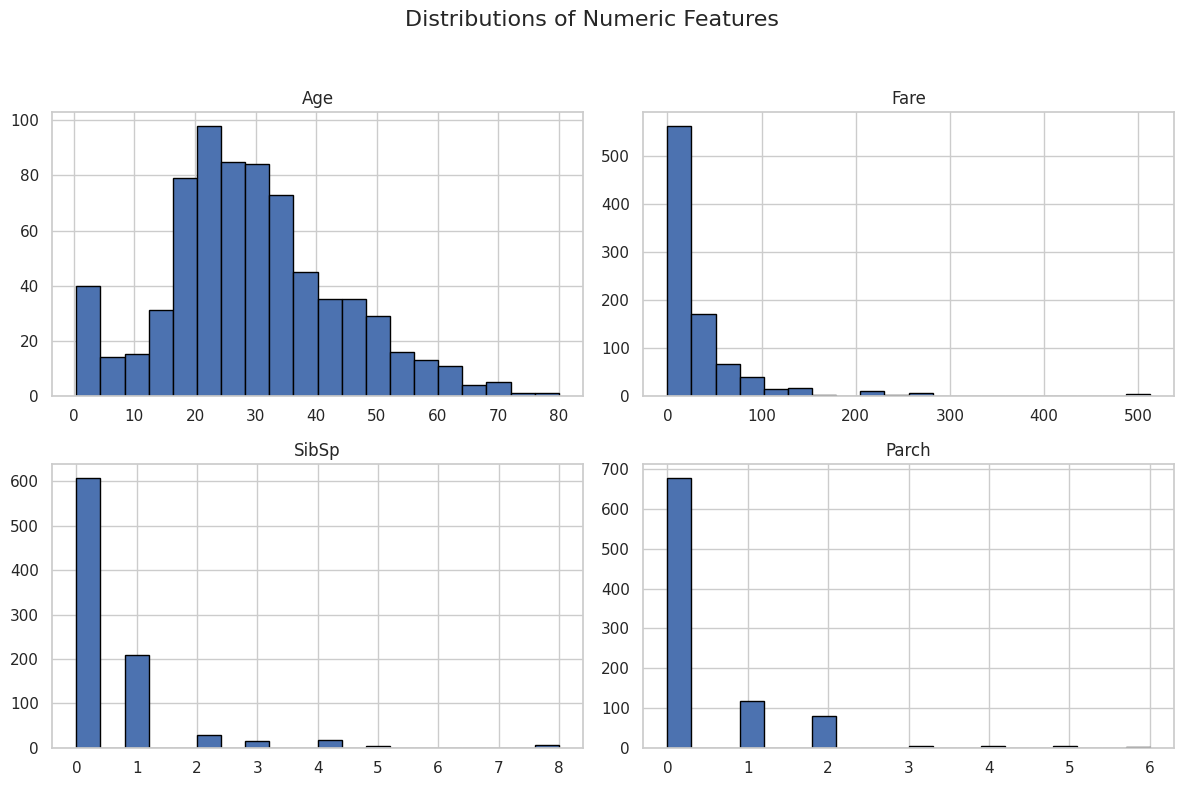

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set up plotting style
sns.set(style="whitegrid")
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot histograms
train[numeric_features].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

This code snippet is used to visualize the distribution of the numeric features in the train DataFrame using histograms:

 * sns.set(style="whitegrid"): Sets the plotting style to "whitegrid" using the  Seaborn library, which provides a nice background grid for the plots.
 * numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']: Defines a list of the numeric columns to be visualized.
 * train[numeric_features].hist(bins=20, figsize=(12, 8), edgecolor='black'): Generates histograms for each of the specified numeric features.
   * bins=20: Specifies the number of bins for each histogram.
   * figsize=(12, 8): Sets the size of the figure containing the histograms.
   * edgecolor='black': Sets the edge color of the histogram bars to black.
 * plt.suptitle("Distributions of Numeric Features", fontsize=16): Adds a title to the entire set of histograms.
 * plt.tight_layout(rect=[0, 0, 1, 0.95]): Adjusts the spacing between the plots to prevent labels from overlapping.
 * plt.show(): Displays the generated histograms.

These histograms help in understanding the distribution and range of values for each numeric feature in the dataset.

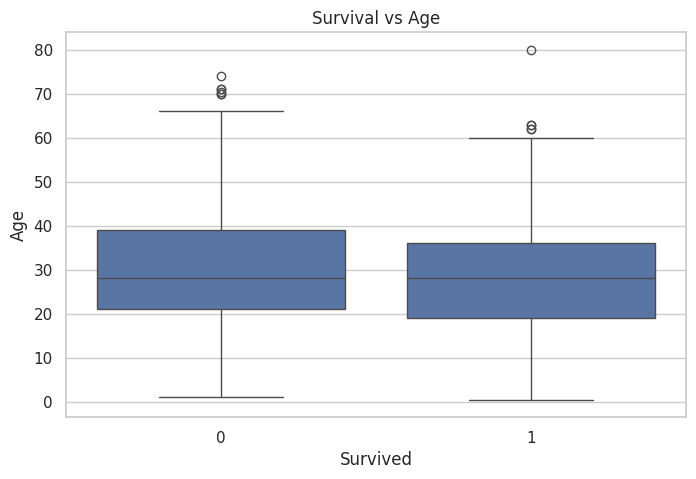

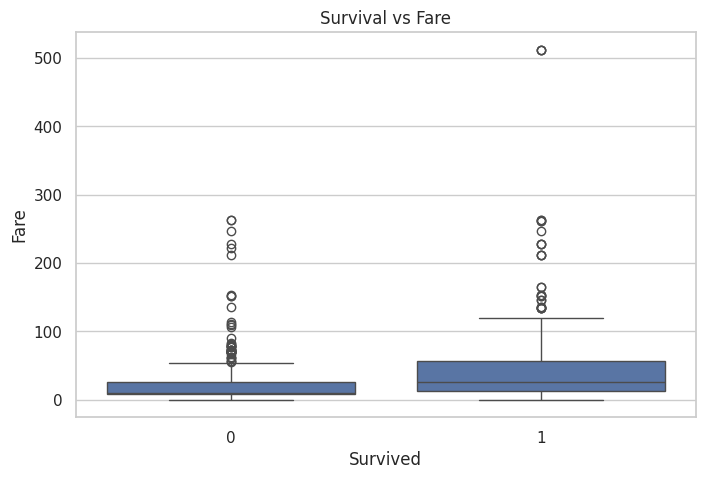

In [ ]:
# Survived vs Age
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Survival vs Age")
plt.show()

# Survived vs Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title("Survival vs Fare")
plt.show()


This code generates box plots to visualize the relationship between 'Survived' and the numeric features 'Age' and 'Fare':

1. plt.figure(figsize=(8, 5)): Creates a new figure for the plot with a specified size.
2. sns.boxplot(x='Survived', y='Age', data=train): Generates a box plot with 'Survived' on the x-axis and 'Age' on the y-axis, using the train DataFrame. Box plots are useful for visualizing the distribution of a continuous variable across different categories.
3. plt.title("Survival vs Age"): Sets the title of the first box plot.
4. plt.show(): Displays the first box plot.
5. The subsequent lines of code repeat the process to create a box plot for 'Survival vs Fare'.

These box plots help in understanding how the distribution of age and fare differs between passengers who survived and those who did not.





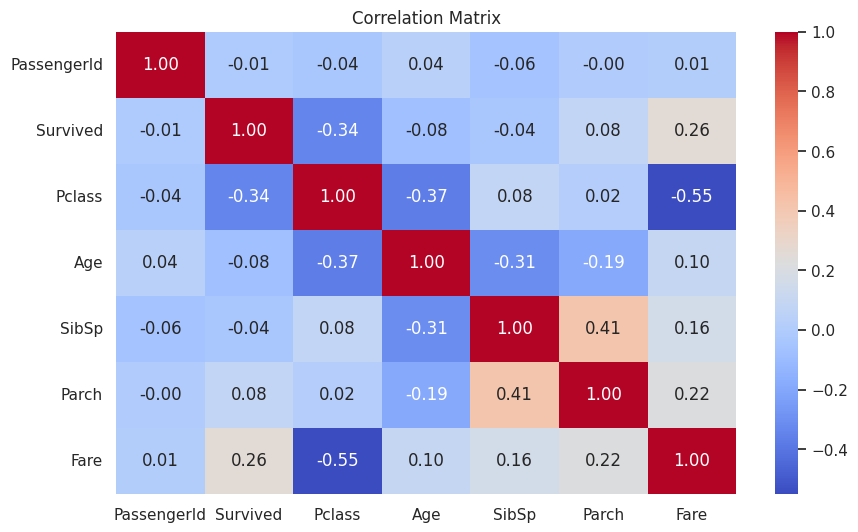

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Code generates a heatmap to visualize the correlation matrix of the numeric features in the train DataFrame:

1. plt.figure(figsize=(10, 6)): Creates a new figure for the heatmap with a specified size.
2. train.corr(numeric_only=True): Calculates the pairwise correlation of columns, excluding null values. numeric_only=True ensures only numeric columns are included in the correlation calculation.
3. sns.heatmap(...): Generates the heatmap.
    * annot=True: Displays the correlation coefficients on the heatmap.
    * cmap='coolwarm': Sets the color map for the heatmap, using a diverging color scheme where 'cool' colors represent negative correlations and 'warm' colors represent positive correlations.
    * fmt=".2f": Formats the annotations to two decimal places.
4. plt.title("Correlation Matrix"): Sets the title of the heatmap.
5. plt.show(): Displays the generated heatmap.

This heatmap helps in understanding the linear relationships between the numeric features in the dataset.

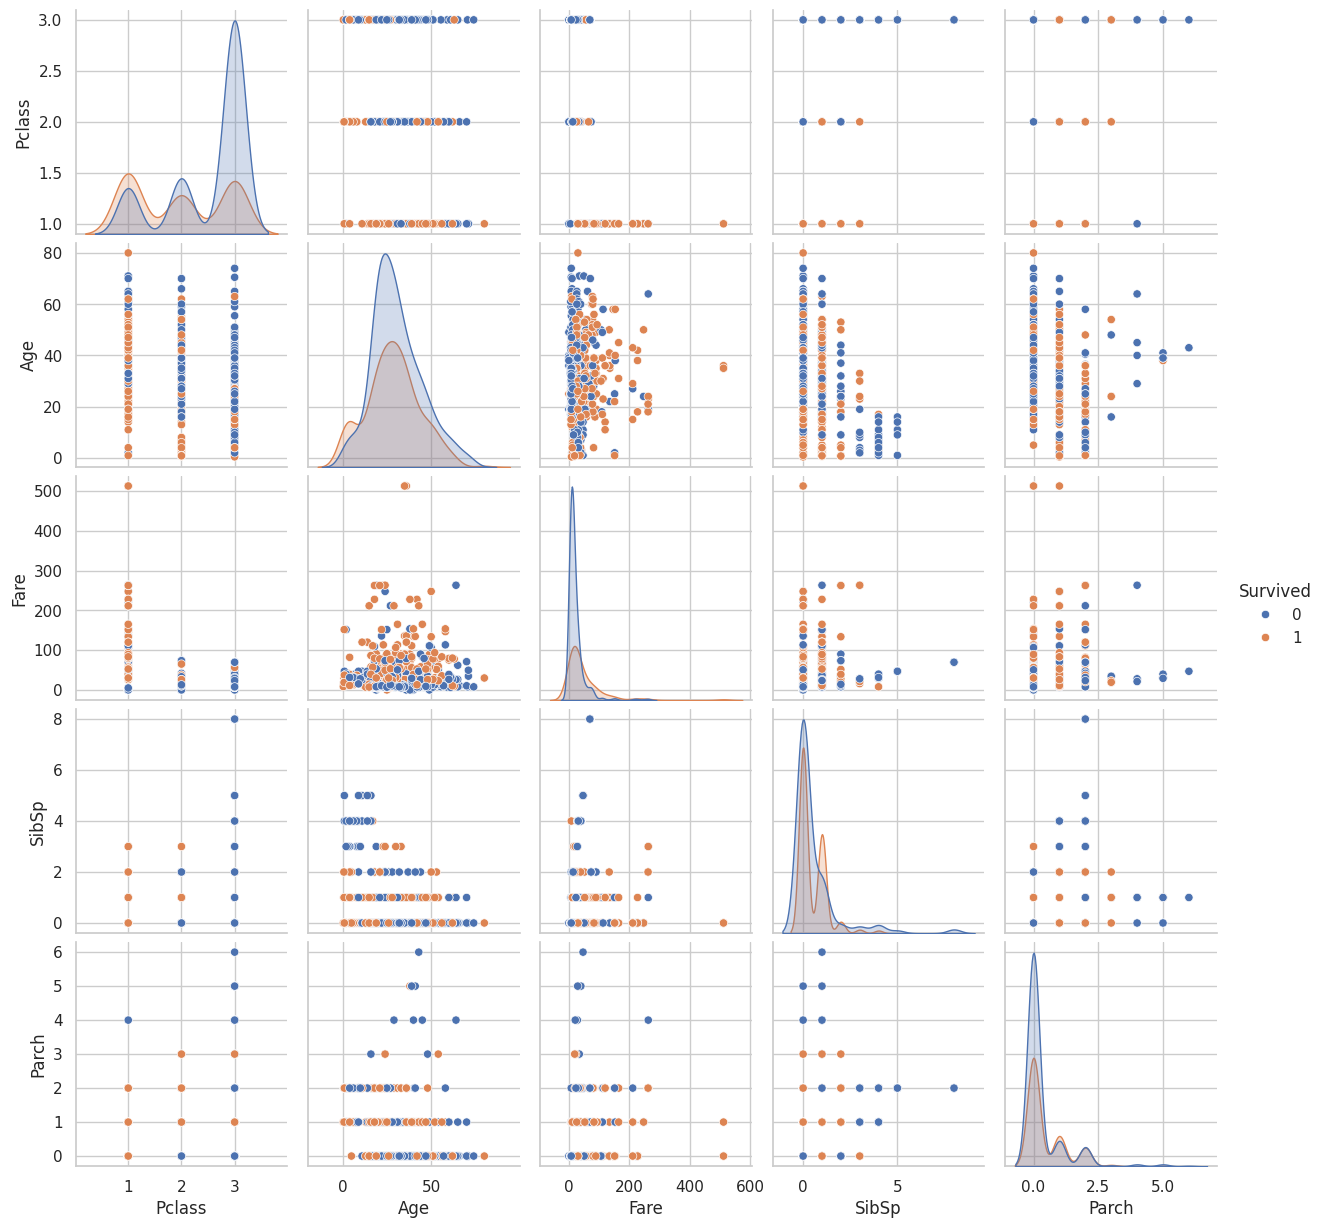

In [ ]:
selected_features = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(train[selected_features], hue='Survived')
plt.show()


Code generates a pair plot to visualize the relationships between selected features, highlighting the difference between passengers who survived and those who did not.

1. selected_features = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']: This line defines a list of the columns from the train DataFrame that will be included in the pair plot.
2. sns.pairplot(train[selected_features], hue='Survived'): This is the core of the plotting code.
 * sns.pairplot(...): This function from the Seaborn library creates a grid of scatterplots where each numeric feature in selected_features is plotted against every other numeric feature in the list. Histograms or kernel density estimates are plotted on the diagonal.
 * train[selected_features]: This selects the specified columns from the train DataFrame to be used for the plot.
 * hue='Survived': This argument colors the points in the scatter plots based on the value of the 'Survived' column (0 for not survived, 1 for survived). This helps in visually distinguishing between the two groups and observing how their distributions or relationships differ across the selected features.
3. plt.show(): This displays the generated pair plot.

This pair plot is useful for exploring the relationships between pairs of features and how these relationships are influenced by the survival outcome.

**5. Data Preprocessing**

In [ ]:
# Load data
df = pd.read_csv("/content/Titanic_train.csv")

# a. Handle missing values (future-safe way)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna("Missing")

# b. Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

Code snippet performs data loading and basic preprocessing on the Titanic training dataset:

1. df = pd.read_csv("D:\\excelr\\Logistic Regression7\\Titanic_train.csv"): This line loads the data from the specified CSV file into a pandas DataFrame named df.
2. Handling missing values:
 * df['Age'] = df['Age'].fillna(df['Age'].median()): Fills the missing values in the 'Age' column with the median age of the existing data. Using the median is a common strategy to impute missing numerical data as it is less sensitive to outliers than the mean.
 * df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]): Fills the missing values in the 'Embarked' column with the mode (most frequent value) of the existing data. This is a common strategy for imputing missing categorical data. [0] is used because .mode() can return multiple values if there's a tie, and we take the first one.
 * df['Cabin'] = df['Cabin'].fillna("Missing"): Fills the missing values in the 'Cabin' column with the string "Missing". This treats missing cabin information as a separate category.
3. Encoding categorical variables:
 * le = LabelEncoder(): Initializes a LabelEncoder object from scikit-learn. This is used to convert categorical labels into numerical format.
 * df['Sex'] = le.fit_transform(df['Sex']): Encodes the 'Sex' column. It fits the encoder to the unique values in 'Sex' (likely 'male' and 'female') and then transforms them into numerical labels (e.g., 0 and 1).
 * df['Embarked'] = le.fit_transform(df['Embarked']): Encodes the 'Embarked' column similarly, transforming the categorical port names into numerical labels.

This code prepares the data by addressing missing values and converting categorical features into a format suitable for machine learning models.

**6. Model Preparation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load and preprocess data
df = pd.read_csv("/content/Titanic_train.csv")
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna("Missing")

# Encode categorical
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Drop columns that are not useful for prediction
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)




**7. Model Training**

In [ ]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



This code snippet demonstrates a complete workflow for training and evaluating a Logistic Regression model for the Titanic survival prediction task:

1. Import Libraries: Imports necessary libraries from pandas and scikit-learn.
2. Load and Preprocess Data:
 * Loads the Titanic_train.csv file into a DataFrame df.
 * Fills missing 'Age' values with the median.
 * Fills missing 'Embarked' values with the mode.
 * Fills missing 'Cabin' values with the string "Missing".
 * Encodes the categorical 'Sex' and 'Embarked' columns into numerical representations using LabelEncoder.
3. Drop Unnecessary Columns: Removes columns like 'Name', 'Ticket', 'Cabin', and 'PassengerId' that are not considered useful for the prediction model.
4. Split Features and Target: Separates the DataFrame into features (X) and the target variable (y, 'Survived').
5. Split into Training and Validation Sets: Divides the data into training (80%) and validation (20%) sets using train_test_split. random_state=42 ensures reproducibility.
6. Train Logistic Regression Model:
 * Initializes a LogisticRegression model. max_iter=1000 is set to ensure the model converges.
 * Trains the model using the training data (X_train, y_train).
7. Predict and Evaluate:
 * Makes predictions on the validation set (X_val) using the trained model.
 * Calculates and prints the accuracy score by comparing the predicted values (y_pred) with the actual values (y_val).
 * Prints a detailed classification report which includes precision, recall, f1-score, and support for each class (0 and 1).
This code effectively handles missing values, prepares categorical data, splits the dataset, trains a logistic regression model, and provides key evaluation metrics to assess its performance.

**8. ROC Curve and AUC**

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC Score: 0.8823680823680824


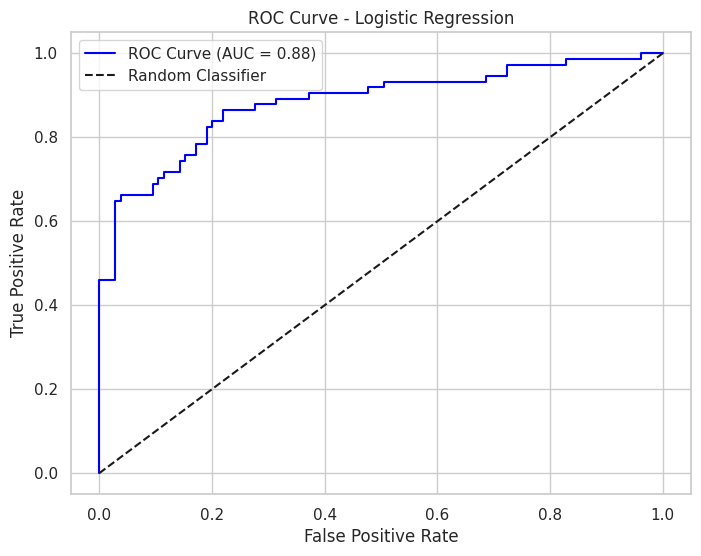

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for ROC-AUC
y_proba = model.predict_proba(X_val)[:, 1]
y_pred = model.predict(X_val)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba))

# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_val, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


**9.Coefficient Interpretation**

In [ ]:
# Combine feature names with coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)


    Feature  Coefficient  Odds Ratio
5      Fare     0.002534    1.002537
2       Age    -0.030433    0.970025
4     Parch    -0.111853    0.894175
6  Embarked    -0.218777    0.803501
3     SibSp    -0.293905    0.745347
0    Pclass    -0.930680    0.394286
1       Sex    -2.596994    0.074497


This code snippet calculates and visualizes several important evaluation metrics for the logistic regression model:

1. Import Libraries: Imports necessary functions from sklearn.metrics and matplotlib.pyplot.
2. Predict Probabilities and Predictions:
 * y_proba = model.predict_proba(X_val)[:, 1]: Predicts the probabilities of the positive class (survival) for the validation set. [:, 1] selects the probabilities for the class labeled '1'.
 * y_pred = model.predict(X_val): Predicts the class labels (0 or 1) for the validation set based on the model's decision threshold.
3. Evaluation Metrics: Calculates and prints standard classification metrics:
 * Accuracy: The proportion of correctly classified instances.
 * Precision: The ability of the classifier not to label as positive a sample that is negative.
 * Recall: The ability of the classifier to find all the positive samples.
 * F1 Score: The harmonic mean of precision and recall, providing a single metric that balances both.
 * ROC-AUC Score: The Area Under the Receiver Operating Characteristic curve, which measures the model's ability to distinguish between the positive and negative classes. A higher AUC indicates better performance.
4. ROC Curve: Generates and displays the ROC curve:
fpr, tpr, _ = roc_curve(y_val, y_proba): Calculates the False Positive Rate (fpr) and True Positive Rate (tpr) for various probability thresholds.
plt.figure(...), plt.plot(...), plt.xlabel(...), plt.ylabel(...), plt.title(...), plt.legend(...), plt.grid(...), plt.show(): These lines create the plot, add the ROC curve, include a dashed line for a random classifier as a baseline, label the axes, add a title, display the legend, add a grid, and show the plot. The AUC score is included in the legend.
This code provides a comprehensive evaluation of the trained model's performance.

**10.Save the Model**

In [ ]:
import pickle

# Save the trained logistic regression model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


This code saves the trained logistic regression model to a file named "model.pkl" using the pickle library. This allows you to reuse the model later without retraining.

**11.Print Model Location**

In [ ]:
import os
print("Model saved at:", os.path.abspath("model.pkl"))


Model saved at: /content/model.pkl


Displays the full path of the saved model file on your system.

**12.Streamlit App**

In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load the model
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("Titanic Survival Predictor ")

# User inputs
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["Male", "Female"])
age = st.slider("Age", 0, 80, 25)
sibsp = st.number_input("Siblings/Spouses Aboard", 0, 8, 0)
parch = st.number_input("Parents/Children Aboard", 0, 6, 0)
fare = st.number_input("Fare", 0.0, 600.0, 32.0)
embarked = st.selectbox("Embarked", ["C", "Q", "S"])

# Encoding inputs
sex = 1 if sex == "Male" else 0
embarked_map = {"C": 0, "Q": 1, "S": 2}
embarked = embarked_map[embarked]

# Make prediction
if st.button("Predict"):
    features = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][1]

    if prediction == 1:
        st.success(f" The passenger would survive! (Probability: {probability:.2f})")
    else:
        st.error(f" The passenger would not survive. (Probability: {probability:.2f})")


 This code creates a simple web application using Streamlit to predict Titanic survival based on user inputs:

1. Import Libraries: Imports streamlit for building the web app, pickle for loading the trained model, and numpy for handling numerical data.
2. Load the Model: Opens the "model.pkl" file in binary read mode ("rb") and loads the saved logistic regression model using pickle.load().
3. Set up Streamlit App:
 * st.title("Titanic Survival Predictor 🚢"): Sets the title of the Streamlit application.
4. Get User Inputs: Creates various input widgets for the user to provide passenger information:
 * st.selectbox(): Creates dropdown menus for selecting passenger class, sex, and embarkation point.
 * st.slider(): Creates a slider for selecting the passenger's age.
 * st.number_input(): Creates input fields for numerical values like siblings/spouses aboard, parents/children aboard, and fare.
5. Encode Inputs: Converts the user-friendly categorical inputs ("Male"/"Female", "C"/"Q"/"S") into the numerical format (0/1 for sex, 0/1/2 for embarked) that the trained model expects.
6. Make Prediction:
 * if st.button("Predict"):: This block of code is executed when the "Predict" button is clicked.
 * features = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]]): Creates a NumPy array from the user's inputs. The model expects a 2D array, hence the double brackets.
 * prediction = model.predict(features)[0]: Uses the loaded model to predict the survival class (0 or 1). [0] extracts the single prediction from the result array.
 * probability = model.predict_proba(features)[0][1]: Uses the loaded model to predict the probability of the positive class (survival). [0][1] extracts the probability of surviving.
7. Display Prediction Result:
 * An if/else statement checks the prediction value.
 * st.success() or st.error() displays a message indicating whether the passenger would survive or not, along with the predicted probability formatted to two decimal places.
This code allows users to interact with the trained model through a simple web interface and get predictions based on the input features.

**Conclusion**:

The analysis performed in this notebook:

1. We loaded and explored the Titanic dataset, identifying missing values in the 'Age', 'Cabin', and 'Embarked' columns.
2. We visualized the distribution of numeric features and the relationship between survival and age/fare.
3. We preprocessed the data by handling missing values and encoding categorical features.
4. We trained a Logistic Regression model and evaluated its performance using accuracy, precision, recall, F1-score, and ROC-AUC. The model achieved an accuracy of 81% and an ROC-AUC score of 0.88 on the validation set, suggesting it has reasonable predictive power for Titanic survival.
5. We also examined the feature importances (coefficients), which show the impact of each feature on the survival prediction.
6. Finally, we saved the trained model and created a basic Streamlit application to demonstrate how the model can be used for predictions with new data.

In conclusion, the Logistic Regression model built here provides a good starting point for predicting Titanic survival, with key features like 'Sex', 'Pclass', and 'Fare' being significant predictors. Further improvements could involve more advanced feature engineering or exploring different machine learning algorithms.

**Interview Questions:**

1. What is the difference between Precision and Recall?

**Precision:**

→ Measures how many predicted positives are actually correct.

→ Formula:
         Precision = TP / (TP + FP)

→ Use when False Positives are costly.

→ Example: Email spam filter
   (You don’t want to mark important mails as spam.)

**Recall:**

→ Measures how many actual positives were correctly predicted.

→ Formula:
    Recall = TP / (TP + FN)

→ Use when False Negatives are costly.

→ Example: Cancer detection
   (You don’t want to miss a real patient.)

2. What is Cross-Validation, and Why is it Important in Binary Classification?

Definition:
Cross-validation is a resampling technique used to evaluate a model’s performance by splitting the data into multiple train-test folds.

1. How it works (e.g., 5-fold CV):

 * Split data into 5 parts (folds).

 * Train the model on 4 folds, test on the 1 remaining.

 * Repeat 5 times, each time with a different test fold.

 * Average the performance metrics.

2. Why it’s important:

 * Reduces risk of overfitting or underfitting

 * Gives a more robust estimate of model performance

 * Useful especially when dataset is small or imbalanced